# Read DENUE file

## Import libraries

In [139]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

## Zona limite

<AxesSubplot: >

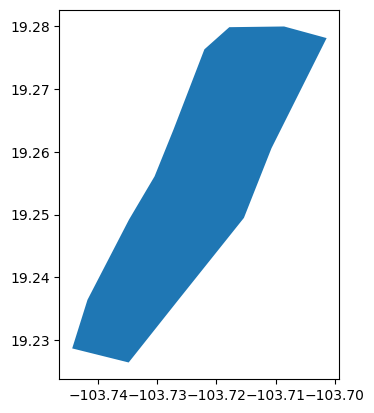

In [140]:
limite = gpd.read_file('qgis\zona_limite.gpkg')
limite.plot()

## Denue file

In [141]:
df_full = gpd.read_file('data\denue_2023.gpkg')
df_full = df_full.to_crs('EPSG:32613')
df_full.head()

,d_llave,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,nom_estab,...,tipocencom,nom_cencom,telefono,tipounieco,fecha_alta,nic,nop,tipo_ue,clee,geometry
0,3513760.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIA DE LA CRUZ,...,None,None,None,None,None,None,None,None,None,POINT (634094.417 2128023.541)
1,2574899.0,06,COLIMA,002,COLIMA,0001,Colima,1458,016,FARMACIA GENERICOS MI SALUD,...,None,None,None,None,None,None,None,None,None,POINT (632418.144 2127299.749)
2,4185355.0,06,COLIMA,002,COLIMA,0001,Colima,0746,034,FARMACIA GUADALUPANA DE COLIMA,...,None,None,None,None,None,None,None,None,None,POINT (633747.834 2128125.142)
3,4186049.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIAS GUADALAJARA,...,None,None,None,None,None,None,None,None,None,POINT (633948.914 2128077.523)
4,2935124.0,06,COLIMA,002,COLIMA,0001,Colima,0746,022,FARMACIA ZAPOTLAN,...,None,None,None,None,None,None,None,None,None,POINT (634129.486 2128056.984)


<AxesSubplot: >

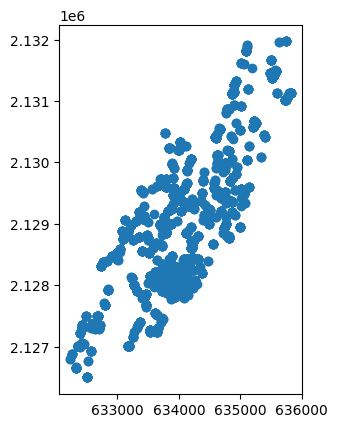

In [142]:
df_full.plot()

In [143]:
columns_to_ignore = [
  'cve_ent', 'entidad', 'cve_mun', 'municipio','tipo_calle','calle', 'tipo_vial1', 
  'calle_1', 'tipo_vial2', 'calle_2', 'tipo_vial3','calle_3', #'numero_ext', 
  'edificio', 'numero_int', 'tipo_asent','colonia', 'cod_postal', 'telefono1', 
  'telefono2', 'ext_tel1','ext_tel2', 'fax','num_local','correoelec', 'www', 
  'correoele2','latitud', 'longitud','index_right', 'id', 'per_ocu', 'tipo_vial', 
  'nom_vial', 'tipo_v_e_1', 'nom_v_e_1','tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 
  'nom_v_e_3', 'letra_ext','edificio_e', 'letra_int', 'nomb_asent', 'tipocencom', 
  'nom_cencom','telefono', 'tipounieco',  'nic', 'nop', "tipo_estab", 'clee',
  'tipo_ue', "centro_com", "raz_social","est_perocu","nom_propie","d_llave","des_perocu",
  "estatus"]

In [144]:
df_with_columns = df_full.drop(columns_to_ignore, axis=1)
print(df_with_columns.columns)

Index(['cve_loc', 'localidad', 'ageb', 'manzana', 'nom_estab', 'numero_ext',
       'codigo_act', 'nombre_act', 'alta', 'fecha_alta', 'geometry'],
      dtype='object')


In [145]:
df_with_columns.sort_values(by=["ageb","manzana", "numero_ext"], inplace=True)

In [146]:
# check duplicates in agenb and manzana

df_with_columns["agebmanzana"] = df_with_columns["ageb"] + df_with_columns["manzana"] + df_with_columns["numero_ext"].astype(str)

In [147]:
df_with_columns.drop_duplicates(subset=["agebmanzana"], inplace=True)

In [148]:
df_with_columns.localidad.unique()

array(['CIUDAD DE VILLA DE Ã\x81LVAREZ', 'Ciudad de Villa de Álvarez',
       'COLIMA', 'Colima'], dtype=object)

In [149]:
print(len(df_with_columns.nom_estab.unique()))


330


In [150]:
import editdistance

string1 = 'INSTITO TECNOLÃ“GICO DE COLIMA'
string2 = 'INSTITO TECNOLOGICO DE COLIMA'
string3 = 'INSTITO TECNOLÓGICO DE COLIMA'

# Compute the Levenshtein distance between all pairs of strings
dist12 = editdistance.eval(string1, string2)
dist13 = editdistance.eval(string1, string3)
dist23 = editdistance.eval(string2, string3)

# Define a threshold for similarity/duplicates
threshold = 5

# Check if any pair of strings is below the threshold
if dist12 <= threshold or dist13 <= threshold or dist23 <= threshold:
    print("The strings are similar or duplicates.")
else:
    print("The strings are not similar or duplicates.")

The strings are similar or duplicates.


In [151]:
# set these columns as lower case [localidad, nom_estab, nombre_act]
df_with_columns["localidad"] = df_with_columns["localidad"].str.title()
df_with_columns["nom_estab"] = df_with_columns["nom_estab"].str.title()
df_with_columns["nombre_act"] = df_with_columns["nombre_act"].str.title()

In [152]:
threshold = 5
strings = df_with_columns.nom_estab.unique()
for s in strings:
    for s_row in df_with_columns.nom_estab:
        dist = editdistance.eval(s, s_row)
        if dist <= threshold:
            df_with_columns.nom_estab.replace(s_row, s, inplace=True)

In [153]:
locs = df_with_columns.localidad.unique()
for loc in locs:
    for s_row in df_with_columns.localidad:
        dist = editdistance.eval(loc, s_row)
        if dist <= threshold:
            df_with_columns.localidad.replace(s_row, loc, inplace=True)

In [154]:
acts = df_with_columns.nombre_act.unique()
for act in acts:
    for s_row in df_with_columns.nombre_act:
        dist = editdistance.eval(act, s_row)
        if dist <= threshold:
            df_with_columns.nombre_act.replace(s_row, act, inplace=True)

In [155]:
df_with_columns.head()

,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,fecha_alta,geometry,agebmanzana
376,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,None,JULIO 2010,POINT (634020.879 2130335.308),02730011
103,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,24A,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,None,POINT (634113.451 2130263.808),027300124A
1271,0001,Ciudad De Villa De Álvarez,0288,024,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,None,2010-07,POINT (634020.878 2130335.308),02880241
206,0001,Colima,0318,003,Farmacia Zapotlan,555,464112,Farmacias Sin Minisãºper,None,DICIEMBRE 2014,POINT (634470.707 2129245.509),0318003555
27,0001,Colima,0318,004,Farmacias Guadalajara,108,464112,Farmacias Sin Minisãºper,JULIO 2010,None,POINT (634249.431 2129244.757),0318004108


In [156]:
df_with_columns = gpd.GeoDataFrame(df_with_columns, geometry='geometry', crs='EPSG:32613')
df_with_columns.reset_index(inplace=True, drop=True)
df_with_columns.head()

,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,fecha_alta,geometry,agebmanzana
0,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,None,JULIO 2010,POINT (634020.879 2130335.308),02730011
1,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,24A,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,None,POINT (634113.451 2130263.808),027300124A
2,0001,Ciudad De Villa De Álvarez,0288,024,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,None,2010-07,POINT (634020.878 2130335.308),02880241
3,0001,Colima,0318,003,Farmacia Zapotlan,555,464112,Farmacias Sin Minisãºper,None,DICIEMBRE 2014,POINT (634470.707 2129245.509),0318003555
4,0001,Colima,0318,004,Farmacias Guadalajara,108,464112,Farmacias Sin Minisãºper,JULIO 2010,None,POINT (634249.431 2129244.757),0318004108


In [162]:
# iter rows in the GeoDataFrame df_with_columns
for i in range(df_with_columns.shape[0]):
    # get the row
    row = df_with_columns.iloc[i]

    for j in range(df_with_columns.shape[0]):
        # get the row
        row2 = df_with_columns.iloc[j]
        
        distance = row.geometry.distance(row2.geometry)
        if distance < 10:
            print(row.nom_estab, row2.nom_estab, distance)
            break
    
    
    


Instito Tecnológico De Colima Instito Tecnológico De Colima 0.0
Instito Tecnológico De Colima Instito Tecnológico De Colima 0.0
Instito Tecnológico De Colima Instito Tecnológico De Colima 0.00105107196874703
Farmacia Zapotlan Farmacia Zapotlan 0.0
Farmacias Guadalajara Farmacias Guadalajara 0.0
1027 Colima 4 1027 Colima 4 0.0
Farmacia El Generico 1027 Colima 4 6.511104444261308
Farmacia Mn Similares Farmacia Mn Similares 0.0
Escuela Primaria Rafael Briseño Ramirez Escuela Primaria Rafael Briseño Ramirez 0.0
Escuela Primaria Rafael Briseño Ramirez Escuela Primaria Rafael Briseño Ramirez 0.0
Instituto Marcela Domene Maternal Instituto Marcela Domene Maternal 0.0
Cursos De Ingles Cursos De Ingles 0.0
Distribuciones Médicas De Occidente Distribuciones Médicas De Occidente 0.0
Upe Unidad Psico Educativa Upe Unidad Psico Educativa 0.0
Escuela De Belleza Blanche Escuela De Belleza Blanche 0.0
Escuela De Gastronomia Escuela De Gastronomia 0.0
Blanche Blanche 0.0
Centro Holistico Om-Yam Centro 

In [ ]:
for i, i_row in df_with_columns.iterrows():
    for j, j_row in df_with_columns.iterrows():
        distance = i_row.geometry.distance(j_row.geometry)
        if distance < 10:
            print(i_row.nom_estab, j_row.nom_estab, distance)
            break

In [158]:
points = gpd.GeoSeries(df_with_columns.geometry)
points.crs = 'EPSG:32613'
points 

0      POINT (634020.879 2130335.308)
1      POINT (634113.451 2130263.808)
2      POINT (634020.878 2130335.308)
3      POINT (634470.707 2129245.509)
4      POINT (634249.431 2129244.757)
                    ...              
373    POINT (632593.734 2127365.193)
374    POINT (632486.222 2127496.419)
375    POINT (632774.059 2127706.557)
376    POINT (632672.951 2127496.318)
377    POINT (632713.815 2127345.500)
Name: geometry, Length: 378, dtype: geometry